In [1]:
# import and set alias for pandas
import pandas as pd

In [2]:
# read in purchase_data.csv file

data_file = "../../gt-virt-data-pt-12-2021-u-c/04-Pandas/Homework/HeroesOfPymoli/Resources/purchase_data.csv"

In [3]:
heroes_data = pd.read_csv(data_file)

In [4]:
heroes_data.columns

Index(['Purchase ID', 'SN', 'Age', 'Gender', 'Item ID', 'Item Name', 'Price'], dtype='object')

In [5]:
heroes_data.head()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44


In [32]:
# count unique # of players and create dataframe to allow printing in specified format
unique_cnt = heroes_data["SN"].nunique()
unique_cnt_df = pd.DataFrame([unique_cnt])
unique_cnt_df = unique_cnt_df.rename(columns = {0: "Total Players"})
unique_cnt_df

,Total Players
0,576


In [47]:
# create purchasing analysis stats: # unique items, avg price, # purchases and total revenue
num_unique_items = heroes_data["Item Name"].nunique()
avg_price = heroes_data["Price"].mean()
num_purchases = heroes_data["Purchase ID"].count()
tot_rev = heroes_data["Price"].sum()

# create new df using purchasing stats
# use index option within dataframe function since passing scalar values
purchase_df = pd.DataFrame({"Number of Unique Items": num_unique_items, 
                            "Average Price": avg_price, 
                            "Number of Purchases": num_purchases, 
                            "Total Revenue": tot_rev}, index=[0])
purchase_df

,Number of Unique Items,Average Price,Number of Purchases,Total Revenue
0,179,3.050987,780,2379.77


In [48]:
# create a unique data set of customers
unique_cust = heroes_data.drop_duplicates(subset = "SN", inplace = False)
unique_cust






,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44
...,...,...,...,...,...,...,...
773,773,Hala31,21,Male,19,"Pursuit, Cudgel of Necromancy",1.02
774,774,Jiskjask80,11,Male,92,Final Critic,4.19
775,775,Aethedru70,21,Female,60,Wolf,3.54
777,777,Yathecal72,20,Male,67,"Celeste, Incarnation of the Corrupted",3.46


In [50]:
# use unique_cust df to calculate disribution of gender
gender_df = pd.DataFrame(unique_cust["Gender"].value_counts())
gender_df["Percent"] = gender_df["Gender"]/gender_df["Gender"].sum()
gender_df = gender_df.rename(columns = {"Gender": "Total Count",
                                       "Percent": "Percentage of Players"})
gender_df



,Total Count,Percentage of Players
Male,484,0.840278
Female,81,0.140625
Other / Non-Disclosed,11,0.019097


In [52]:
# create df to allow purchase analysis at gender level
gender_summary = heroes_data[["Gender", "SN", "Price"]]

In [54]:
new_df_test = gender_summary.groupby(["Gender"]).agg(['sum', 'count','nunique'])
new_df_test["avgpur"] = new_df_test[('Price',     'sum')]/new_df_test[('SN', 'count')]
new_df_test["avgpurcust"] = new_df_test[('Price',     'sum')]/new_df_test[('SN', 'nunique')]
new_df_test.rename(columns = {"SN": "Test"})
new_df_test


SN  \
                                                                     sum   
Gender                                                                     
Female                 Lisassa64Reunasu60Reulae52Assosia88Phaelap26Ch...   
Male                   Lisim78Lisovynya38Ithergue48Chamassasya86Iskos...   
Other / Non-Disclosed  Chanosian48Siarithria38Haerithp41Sundim98Jiski...   

                                       Price                  avgpur  \
                      count nunique      sum count nunique             
Gender                                                                 
Female                  113      81   361.94   113      79  3.203009   
Male                    652     484  1967.64   652     144  3.017853   
Other / Non-Disclosed    15      11    50.19    15      12  3.346000   

                      avgpurcust  
                                  
Gender                            
Female                  4.468395  
Male                    4.065372  
Other / Non-Disclosed   4.562727

In [54]:
new_df_test.columns = new_df_test.columns.get_level_values(0)
new_df_test.columns

Index(['SN', 'SN', 'SN', 'Price', 'Price', 'Price'], dtype='object')

In [44]:
new_new = new_df_test.reset_index(drop = True, inplace = True)
print(new_new)

None


In [45]:
# create bins
age_bin_summary = unique_cust[["Age", "SN"]]
bins = [0, 9, 14, 19, 24, 29, 34, 39, 100]
age_bin_names = ["<10", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40+"]



In [23]:
age_bin_summary["Age Summary"] = pd.cut(age_bin_summary["Age"], bins, labels = age_bin_names, include_lowest = True)
age_bin_summary

<ipython-input-23-a8286ed797d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_bin_summary["Age Summary"] = pd.cut(age_bin_summary["Age"], bins, labels = age_bin_names, include_lowest = True)


,Age,SN,Age Summary
0,20,Lisim78,20-24
1,40,Lisovynya38,40+
2,24,Ithergue48,20-24
3,24,Chamassasya86,20-24
4,23,Iskosia90,20-24
...,...,...,...
773,21,Hala31,20-24
774,11,Jiskjask80,10-14
775,21,Aethedru70,20-24
777,20,Yathecal72,20-24


In [24]:
# grouped_age = age_bin_summary.groupby(["Age Summary"])
# create a unique data set of customers
grouped_age = pd.DataFrame(age_bin_summary["Age Summary"].value_counts())
grouped_age["Percent"] = grouped_age["Age Summary"]/grouped_age["Age Summary"].sum()
grouped_age

,Age Summary,Percent
20-24,258,0.447917
15-19,107,0.185764
25-29,77,0.133681
30-34,52,0.090278
35-39,31,0.053819
10-14,22,0.038194
<10,17,0.029514
40+,12,0.020833


In [25]:
# create bins for purchase
price_bin_summary = heroes_data[["Age", "Price", "SN"]]
bins = [0, 9, 14, 19, 24, 29, 34, 39, 100]
price_bin_names = ["<10", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40+"]
price_bin_summary["Age Summary"] = pd.cut(price_bin_summary["Age"], bins, labels = price_bin_names, include_lowest = True)
price_bin_summary

<ipython-input-25-838b904b64e4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_bin_summary["Age Summary"] = pd.cut(price_bin_summary["Age"], bins, labels = price_bin_names, include_lowest = True)


,Age,Price,SN,Age Summary
0,20,3.53,Lisim78,20-24
1,40,1.56,Lisovynya38,40+
2,24,4.88,Ithergue48,20-24
3,24,3.27,Chamassasya86,20-24
4,23,1.44,Iskosia90,20-24
...,...,...,...,...
775,21,3.54,Aethedru70,20-24
776,21,1.63,Iral74,20-24
777,20,3.46,Yathecal72,20-24
778,7,4.19,Sisur91,<10


In [36]:
#grouped_age = pd.DataFrame(age_bin_summary["Age Summary"].value_counts())
# test = heroes_data[["Gender", "SN", "Price"]].groupby(["Gender"]).agg(['sum', 'count','nunique'])
price_bin_test = price_bin_summary[["Age Summary", "SN", "Price"]].groupby(["Age Summary"]).agg(['sum', 'count', 'nunique'])
#price_bin_test = price_bin_summary[["Age Summary", "SN", "Price"]].groupby(["Age Summary"]).sum()
#price_bin_test["avgpur"] = price_bin_test[('Price',     'sum')]/price_bin_test[('SN', 'count')]
#price_bin_test["avgpurcust"] = price_bin_test[('Price',     'sum')]/price_bin_test[('SN', 'nunique')]
#price_bin_test = pd.DataFrame(price_bin_summary["Age Summary"].value_counts())
price_bin_test

SN                \
                                                           sum count nunique   
Age Summary                                                                    
<10          Eusri44Haillyrgue51Seuthep89Haillyrgue51Heudai...    23      17   
10-14        Lirtossa84Aeralria27Reulae52Zhisrisu83Raesty92...    28      22   
15-19        Idai61Sondim73Aidaillodeu39Yaliru88Jiskimya77I...   136     107   
20-24        Lisim78Ithergue48Chamassasya86Iskosia90Yalae81...   365     258   
25-29        Lisirra87Yasrisu92Phaelap26Chamirraya83Pheodai...   101      77   
30-34        Chamalo71Siala43Idaisuir85Iaralrgue74Ilosianya...    73      52   
35-39        Itheria73Chanosian48Saesrideu94Siarithria38Far...    41      31   
40+          Lisovynya38Eyrian71Eyrian71Jiskjask85Isursuir3...    13      12   

               Price                
                 sum count nunique  
Age Summary                         
<10            77.13    23      21  
10-14          82.78    28      24  
15-19         412.89   136      83  
20-24        1114.06   365     135  
25-29         293.00   101      73  
30-34         214.00    73      56  
35-39         147.67    41      34  
40+            38.24    13      13

##### price_bin_test.columns

In [28]:
# top spender
spender_summary = heroes_data[["SN", "Price"]]
top_spender = spender_summary.groupby(["SN"]).agg(['sum', 'count','nunique'])
top_spender_sorted = top_spender.sort_values(('Price',     'sum'), ascending = False)
top_spender_sorted

Price              
               sum count nunique
SN                              
Lisosia93    18.96     5       5
Idastidru52  15.45     4       4
Chamjask73   13.83     3       3
Iral74       13.62     4       4
Iskadarya95  13.10     3       3
...            ...   ...     ...
Ililsasya43   1.02     1       1
Irilis75      1.02     1       1
Aidai61       1.01     1       1
Chanirra79    1.01     1       1
Alo38         1.00     1       1

[576 rows x 3 columns]

In [29]:
# popular
popular_summary = heroes_data[["Item Name", "Price"]]
top_popular = popular_summary.groupby(["Item Name"]).agg(['sum', 'count','nunique'])
popular_sorted = top_popular.sort_values(('Price',   'count'), ascending = False)
popular_sorted

Price              
                                                sum count nunique
Item Name                                                        
Final Critic                                  59.99    13       2
Oathbreaker, Last Hope of the Breaking Storm  50.76    12       1
Persuasion                                    28.99     9       2
Nirvana                                       44.10     9       1
Extraction, Quickblade Of Trembling Hands     31.77     9       1
...                                             ...   ...     ...
Riddle, Tribute of Ended Dreams                3.30     1       1
Betrayer                                       2.94     1       1
The Decapitator                                1.75     1       1
Gladiator's Glaive                             1.93     1       1
Ghost Reaver, Longsword of Magic               2.17     1       1

[179 rows x 3 columns]

In [30]:
# most profitable
purchase_sorted = top_popular.sort_values(('Price',     'sum'), ascending = False)
purchase_sorted

Price              
                                                sum count nunique
Item Name                                                        
Final Critic                                  59.99    13       2
Oathbreaker, Last Hope of the Breaking Storm  50.76    12       1
Nirvana                                       44.10     9       1
Fiery Glass Crusader                          41.22     9       1
Singed Scalpel                                34.80     8       1
...                                             ...   ...     ...
Flux, Destroyer of Due Diligence               2.12     2       1
Whistling Mithril Warblade                     2.00     2       1
Exiled Mithril Longsword                       2.00     1       1
Gladiator's Glaive                             1.93     1       1
The Decapitator                                1.75     1       1

[179 rows x 3 columns]

In [31]:
popular_sorted.columns

MultiIndex([('Price',     'sum'),
            ('Price',   'count'),
            ('Price', 'nunique')],
           )

In [32]:
heroes_data.dtypes

Purchase ID      int64
SN              object
Age              int64
Gender          object
Item ID          int64
Item Name       object
Price          float64
dtype: object

In [33]:
import matplotlib.pyplot as plt
plt.close("all")

In [34]:
plt.figure()

<Figure size 640x480 with 0 Axes>

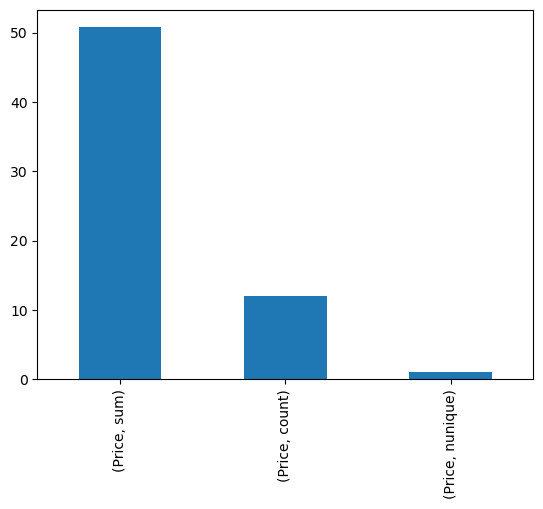

In [35]:
purchase_sorted.iloc[1].plot.bar()
plt.show()